In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


data_path = "Olympic Data Analysis/Raw Data/athlete_events.csv"
noc_path = "Olympic Data Analysis/Raw Data/noc_regions.csv"

# Read the data 
data = pd.read_csv(data_path)
noc_data = pd.read_csv(noc_path)
merge_df = pd.merge(data, noc_data, on="NOC", how="right")

In [3]:
#data cleaning
merge_df = merge_df.rename(columns={"City":"Hosting City", "region":"Athlete Country"})
#add columns for coutnry that we fetch country
merge_df["Hosting Country"] = ""
merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Hosting City,Sport,Event,Medal,Athlete Country,notes,Hosting Country
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN,
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN,
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN,


In [4]:
merge_df['Hosting City'].unique()

array(['Melbourne', 'Berlin', 'London', 'Moskva', 'Tokyo', 'Munich',
       'Mexico City', 'Athina', 'Beijing', 'Rio de Janeiro', 'Seoul',
       'Roma', 'Atlanta', 'Los Angeles', 'Helsinki', 'Calgary',
       'Albertville', 'Barcelona', 'Sydney', 'Montreal', 'Sochi',
       'Torino', 'Vancouver', 'Salt Lake City', 'Innsbruck',
       'Lillehammer', 'Nagano', 'Lake Placid', 'Sarajevo', 'Stockholm',
       'Paris', 'Amsterdam', 'Squaw Valley', 'Oslo', 'Sankt Moritz',
       'Grenoble', 'Sapporo', 'Antwerpen', "Cortina d'Ampezzo",
       'Chamonix', 'St. Louis', 'Garmisch-Partenkirchen', nan],
      dtype=object)

In [6]:
#using datafram.loc to set value based on the condition
merge_df.loc[merge_df['Hosting City'] == 'Melbourne', 'Hosting Country'] = 'Australia'
merge_df.loc[merge_df['Hosting City'] == 'Berlin', 'Hosting Country'] = 'Germany'
merge_df.loc[merge_df['Hosting City'] == 'London', 'Hosting Country'] = 'UK'
merge_df.loc[merge_df['Hosting City'] == 'Moskva', 'Hosting Country'] = 'Russia'
merge_df.loc[merge_df['Hosting City'] == 'Tokyo', 'Hosting Country'] = 'Japan'
merge_df.loc[merge_df['Hosting City'] == 'Munich', 'Hosting Country'] = 'Germany'
merge_df.loc[merge_df['Hosting City'] == 'Mexico City', 'Hosting Country'] = 'Mexico'
merge_df.loc[merge_df['Hosting City'] == 'Athina', 'Hosting Country'] = 'Greece'
merge_df.loc[merge_df['Hosting City'] == 'Beijing', 'Hosting Country'] = 'China'
merge_df.loc[merge_df['Hosting City'] == 'Rio de Janeiro', 'Hosting Country'] = 'Brazil'
merge_df.loc[merge_df['Hosting City'] == 'Seoul', 'Hosting Country'] = 'Korea'
merge_df.loc[merge_df['Hosting City'] == 'Roma', 'Hosting Country'] = 'Italy'
merge_df.loc[merge_df['Hosting City'] == 'Atlanta', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Los Angeles', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Helsinki', 'Hosting Country'] = 'Finland'
merge_df.loc[merge_df['Hosting City'] == 'Calgary', 'Hosting Country'] = 'Canada'
merge_df.loc[merge_df['Hosting City'] == 'Albertville', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'Barcelona', 'Hosting Country'] = 'Spain'
merge_df.loc[merge_df['Hosting City'] == 'Sydney', 'Hosting Country'] = 'Australian'
merge_df.loc[merge_df['Hosting City'] == 'Montreal', 'Hosting Country'] = 'Canada'
merge_df.loc[merge_df['Hosting City'] == 'Sochi', 'Hosting Country'] = 'Russia'
merge_df.loc[merge_df['Hosting City'] == 'Torino', 'Hosting Country'] = 'Italy'
merge_df.loc[merge_df['Hosting City'] == 'Vancouver', 'Hosting Country'] = 'Canada'
merge_df.loc[merge_df['Hosting City'] == 'Salt Lake City', 'Hosting Country'] = 'Utah'
merge_df.loc[merge_df['Hosting City'] == 'Innsbruck', 'Hosting Country'] = 'Austria'
merge_df.loc[merge_df['Hosting City'] == 'Lillehammer', 'Hosting Country'] = 'Norway'
merge_df.loc[merge_df['Hosting City'] == 'Nagano', 'Hosting Country'] = 'Japan'
merge_df.loc[merge_df['Hosting City'] == 'Lake Placid', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Sarajevo', 'Hosting Country'] = 'Bosnia and Herzegovina'
merge_df.loc[merge_df['Hosting City'] == 'Stockholm', 'Hosting Country'] = 'Sweden'
merge_df.loc[merge_df['Hosting City'] == 'Paris', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'Amsterdam', 'Hosting Country'] = 'Netherlands'
merge_df.loc[merge_df['Hosting City'] == 'Squaw Valley', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Oslo', 'Hosting Country'] = 'Norway'
merge_df.loc[merge_df['Hosting City'] == 'Sankt Moritz', 'Hosting Country'] = 'Switzerland'
merge_df.loc[merge_df['Hosting City'] == 'Grenoble', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'Sapporo', 'Hosting Country'] = 'Japan'
merge_df.loc[merge_df['Hosting City'] == 'Antwerpen', 'Hosting Country'] = 'Belgium'
merge_df.loc[merge_df['Hosting City'] == "Cortina d'Ampezzo", 'Hosting Country'] = 'Italy'
merge_df.loc[merge_df['Hosting City'] == 'Chamonix', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'St. Louis', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Garmisch-Partenkirchen', 'Hosting Country'] = 'Germany'


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Hosting City,Sport,Event,Medal,Athlete Country,notes,Hosting Country
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,Australia
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN,
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN,
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN,


In [ ]:
#replacing hosting city with city and country
merge_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)
df.replace('Rio de Janeiro', 'Brazil', inplace=True)
df.replace('London', 'United Kingdom', inplace=True)
df.replace('Beijing', 'China', inplace=True)
df.replace('Athina', 'Greece', inplace=True)
df.replace(['Sydney', 'Melbourne'], 'Australia', inplace=True)
df.replace(['Atlanta', 'Los Angeles', 'St. Louis'], 'United States of America', inplace=True)
df.replace('Barcelona', 'Spain', inplace=True)
df.replace('Seoul', 'South Korea', inplace=True)
df.replace('Moskva', 'Russia', inplace=True)
df.replace('Montreal', 'Canada', inplace=True)
df.replace(['Munich', 'Berlin'], 'Germany', inplace=True)
df.replace('Mexico City', 'Mexico', inplace=True)
df.replace('Tokyo', 'Japan', inplace=True)
df.replace('Roma', 'Italy', inplace=True)
df.replace('Paris', 'France', inplace=True)
df.replace('Helsinki', 'Finland', inplace=True)
df.replace('Amsterdam', 'Netherlands', inplace=True)
df.replace('Antwerpen', 'Belgium', inplace=True)
df.replace('Stockholm', 'Sweden', inplace=True

In [15]:
#top 10 performing countries 
metals_per_country = merge_df.groupby(["region"])['Medal'].count()
top_10_countries = pd.DataFrame(metals_per_country).sort_values("Medal", ascending = False).head(10)
top_10_countries

,Medal
region,
USA,5637
Russia,3947
Germany,3756
UK,2068
France,1777
Italy,1637
Sweden,1536
Canada,1352
Australia,1349


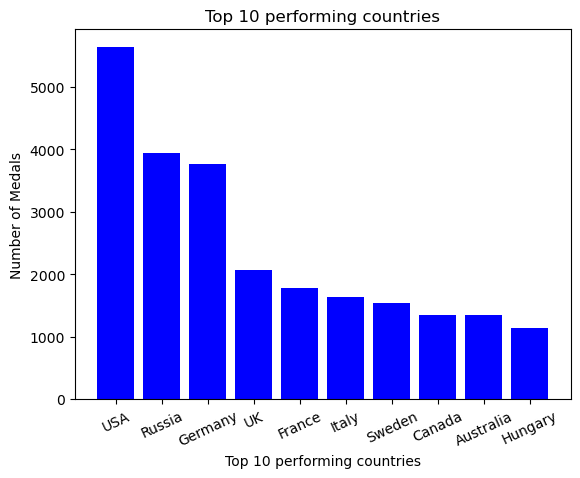

In [16]:
#top 10 performing countries bar chart
plt.bar(top_10_countries.index.values, top_10_countries['Medal'], color = "blue",alpha=1.0, align="center")
plt.title("Top 10 performing countries")
plt.xlabel('Top 10 performing countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=25)
plt.show()

In [17]:
#summer top performing countries
summer_df = pd.DataFrame(merge_df.loc[merge_df["Season"]=="Summer",:])
summermetals_per_country = summer_df.groupby(["region"])['Medal'].count()
top_10_summercountries = pd.DataFrame(summermetals_per_country).sort_values("Medal", ascending = False).head(10)
top_10_summercountries

,Medal
region,
USA,5002
Russia,3188
Germany,3126
UK,1985
France,1627
Italy,1446
Australia,1333
Hungary,1123
Sweden,1108


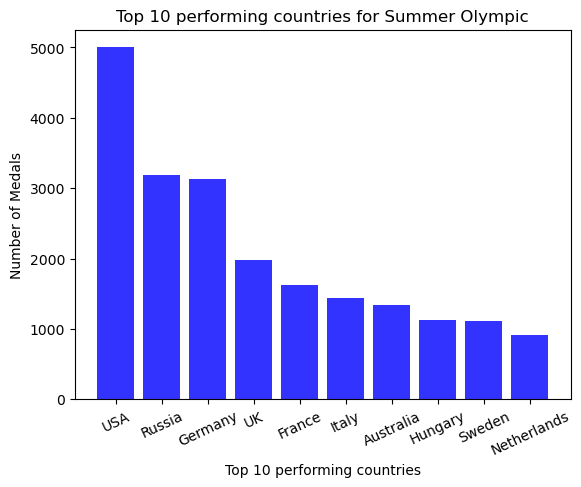

In [18]:
# Generate a bar plot for summer 
plt.bar(top_10_summercountries.index.values, top_10_summercountries['Medal'], color = "blue",alpha=0.8, align="center")
plt.title("Top 10 performing countries for Summer Olympic")
plt.xlabel('Top 10 performing countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=25)
plt.show()

In [19]:
#winter top performing countries
winter_df = pd.DataFrame(merge_df.loc[merge_df["Season"]=="Winter",:])
wintermetals_per_country = winter_df.groupby(["region"])['Medal'].count()
top_10_wintercountries = pd.DataFrame(wintermetals_per_country).sort_values("Medal",ascending= False).head(10)
top_10_wintercountries

,Medal
region,
Russia,759
USA,635
Germany,630
Canada,611
Norway,443
Sweden,428
Finland,426
Austria,280
Switzerland,275


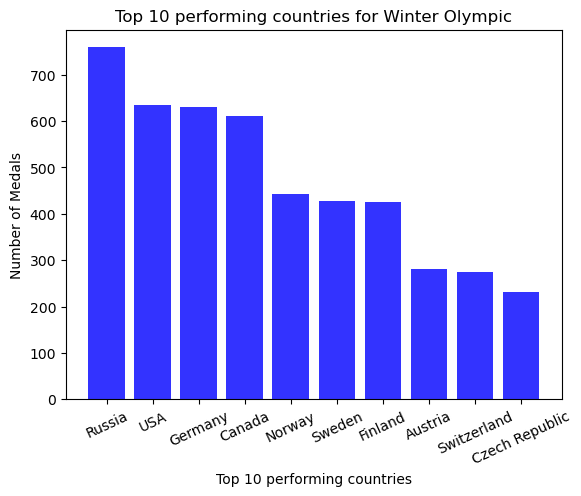

In [20]:
#plot bar graph for winter
plt.bar(top_10_wintercountries.index.values, top_10_wintercountries['Medal'], color = "blue",alpha=0.8, align="center")
plt.title("Top 10 performing countries for Winter Olympic")
plt.xlabel('Top 10 performing countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=25)
plt.show()

In [21]:
#hosting cities
merge_df['City'].unique()

array(['Melbourne', 'Berlin', 'London', 'Moskva', 'Tokyo', 'Munich',
       'Mexico City', 'Athina', 'Beijing', 'Rio de Janeiro', 'Seoul',
       'Roma', 'Atlanta', 'Los Angeles', 'Helsinki', 'Calgary',
       'Albertville', 'Barcelona', 'Sydney', 'Montreal', 'Sochi',
       'Torino', 'Vancouver', 'Salt Lake City', 'Innsbruck',
       'Lillehammer', 'Nagano', 'Lake Placid', 'Sarajevo', 'Stockholm',
       'Paris', 'Amsterdam', 'Squaw Valley', 'Oslo', 'Sankt Moritz',
       'Grenoble', 'Sapporo', 'Antwerpen', "Cortina d'Ampezzo",
       'Chamonix', 'St. Louis', 'Garmisch-Partenkirchen', nan],
      dtype=object)

In [22]:
merge_df['City'].nunique()

42